# ARIMA

In [78]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
from pandas.tseries.offsets import DateOffset

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Get the Data

In [79]:
#NZDestNZTS9: Average number of short-term NZ travellers overseas by main destination (Monthly)
df1 = pd.read_csv('33 NZDestNZTS10.csv')

def fun_date (x):
    y = x[:4]
    m = x[5:]
    d = datetime.strptime("{0} {1} {2} 00:00:00".format(y,m,'01'), "%Y %m %d %H:%M:%S")
    return d
df1['obsdate'] = df1['Month'].apply(fun_date)

df1.index= df1['obsdate']
df1.drop(['Month','obsdate'],axis=1,inplace=True)
df1.head()

,Australia,Cook Islands,Fiji,Samoa,ChinaPRo,India,Thailand,UK,USA,Total
obsdate,,,,,,,,,,
1998-09-01,29028,754,2971,819,1076,746,1082,14496,7718,84696
1998-10-01,28204,643,2348,696,1153,946,1012,9581,6195,73277
1998-11-01,21173,440,1673,640,1283,1241,652,5140,4201,56352
1998-12-01,23630,660,1886,1383,1763,2441,873,6340,4942,76076
1999-01-01,25763,842,2596,2052,1842,2545,833,5410,5029,79016


In [80]:
#VisitorsNatNZTS9: Average number of visitors in New Zealand by country of residence (Monthly)
df2 = pd.read_csv('34 VisitorsNatNZTS9.csv')

def fun_date (x):
    y = x[:4]
    m = x[5:]
    d = datetime.strptime("{0} {1} {2} 00:00:00".format(y,m,'01'), "%Y %m %d %H:%M:%S")
    return d
df2['obsdate'] = df2['Month'].apply(fun_date)

df2.index= df2['obsdate']
df2.drop(['Month','obsdate'],axis=1,inplace=True)
df2.head()

,Australia,ChinaPRof,Japan,Korea,Germany,UK,Canada,USA,Total
obsdate,,,,,,,,,
1998-09-01,17244,748,6093,979,1320,5794,973,3837,57930
1998-10-01,18090,941,5039,1083,2459,7876,1418,6093,68203
1998-11-01,16750,1054,6112,1144,5195,13362,2236,8468,84370
1998-12-01,25909,1270,6670,1836,5499,20238,2935,7865,113853
1999-01-01,27228,1375,6008,2716,6430,22557,3623,10007,122130


# 2. Visualize the Data

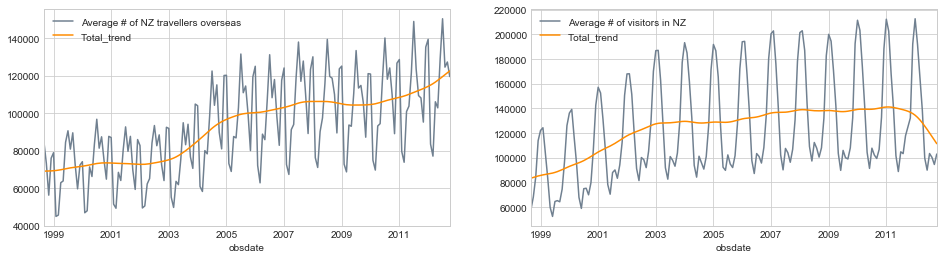

In [81]:
NZ_cycle, NZ_trend = sm.tsa.filters.hpfilter(df1['Total'])
df1['Total_trend'] = NZ_trend

NZ_cycle, NZ_trend = sm.tsa.filters.hpfilter(df2['Total'])
df2['Total_trend'] = NZ_trend

plt.subplot(1,2,1)
df1['Total'].plot(color='slategray', figsize=(16,4),label='Average # of NZ travellers overseas')
df1['Total_trend'].plot(color='darkorange',label='Total_trend')
plt.legend()

plt.subplot(1,2,2)
df2['Total'].plot(color='slategray', figsize=(16,4),label='Average # of visitors in NZ')
df2['Total_trend'].plot(color='darkorange',label='Total_trend')
plt.legend(loc='upper left')

# 3. Testing for Stationarity

In [82]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    print('\n')

In [83]:
#NZDestNZTS9: Average number of short-term NZ travellers overseas by main destination (Monthly)
adf_check(df1['Total'].dropna())

df1['Total_1D'] = df1['Total'] - df1['Total'].shift(1)
adf_check(df1['Total_1D'].dropna())

df1['Total_SeasonalD'] = df1['Total'] - df1['Total'].shift(12)
adf_check(df1['Total_SeasonalD'].dropna())

df1['Total_SeasonalD_1D'] = df1['Total_SeasonalD'] - df1['Total_SeasonalD'].shift(1)
adf_check(df1['Total_SeasonalD_1D'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.41048848203
p-value : 0.908332792675
#Lags Used : 14
Number of Observations Used : 155


Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.19163678328
p-value : 0.0204739074615
#Lags Used : 14
Number of Observations Used : 154


Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.11446855343
p-value : 0.0255008151332
#Lags Used : 12
Number of Observations Used : 145


Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.74387733982
p-value : 2.95852185423e-14
#Lags Used : 3
Number of Observations Used : 153




In [84]:
#VisitorsNatNZTS9: Average number of visitors in New Zealand by country of residence (Monthly)
adf_check(df2['Total'].dropna())

df2['Total_1D'] = df2['Total'] - df2['Total'].shift(1)
adf_check(df2['Total_1D'].dropna())

df2['Total_SeasonalD'] = df2['Total'] - df2['Total'].shift(12)
adf_check(df2['Total_SeasonalD'].dropna())

df2['Total_SeasonalD_1D'] = df2['Total_SeasonalD'] - df2['Total_SeasonalD'].shift(1)
adf_check(df2['Total_SeasonalD_1D'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.73601806175
p-value : 0.00363412538709
#Lags Used : 12
Number of Observations Used : 157


Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.65090789189
p-value : 0.00485912955509
#Lags Used : 11
Number of Observations Used : 157


Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.04327615876
p-value : 0.737155050282
#Lags Used : 12
Number of Observations Used : 145


Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.7542944177
p-value : 5.86840864171e-07
#Lags Used : 11
Number of Observations Used : 145




# 4. Autocorrelation and Partial Autocorrelation Plots

###### NZDestNZTS9: Average number of short-term NZ travellers overseas by main destination (Monthly)

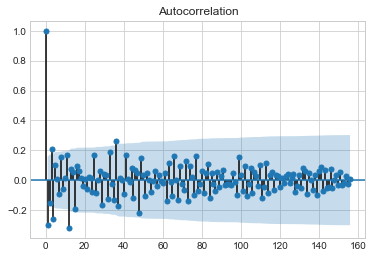

In [85]:
fig_acf = plot_acf(df1['Total_SeasonalD_1D'].dropna())

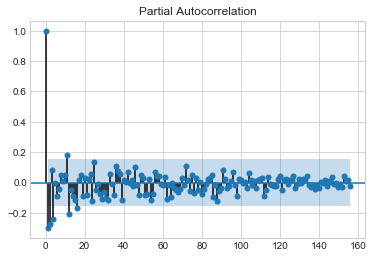

In [86]:
fig_pacf = plot_pacf(df1['Total_SeasonalD_1D'].dropna())

###### VisitorsNatNZTS9: Average number of visitors in New Zealand by country of residence (Monthly)

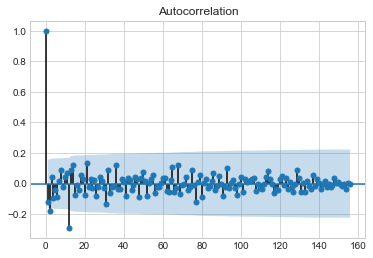

In [87]:
fig_acf = plot_acf(df2['Total_SeasonalD_1D'].dropna())

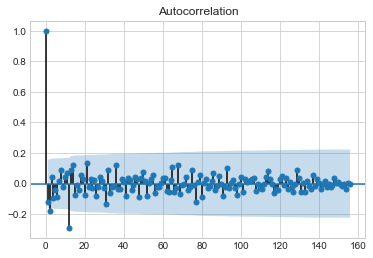

In [88]:
fig_acf = plot_acf(df2['Total_SeasonalD_1D'].dropna())

# 5. Seasonal ARIMA Model

                                 Statespace Model Results                                 
Dep. Variable:                              Total   No. Observations:                  170
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -1561.066
Date:                            Thu, 16 Nov 2017   AIC                           3126.131
Time:                                    01:03:21   BIC                           3132.403
Sample:                                09-01-1998   HQIC                          3128.676
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1246      0.025     -5.049      0.000      -0.173      -0.076
sigma2       2.28e+07   9.73e-12   

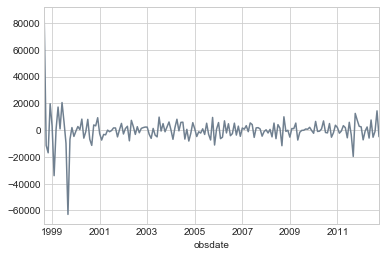

In [89]:
#NZDestNZTS9: Average number of short-term NZ travellers overseas by main destination (Monthly)
model1 = sm.tsa.statespace.SARIMAX(df1['Total'],order=(0,1,0), seasonal_order=(1,1,0,12))
results1 = model1.fit()
print(results1.summary())
results1.resid.plot(color='slategray')

                                 Statespace Model Results                                 
Dep. Variable:                              Total   No. Observations:                  170
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -1555.316
Date:                            Thu, 16 Nov 2017   AIC                           3114.631
Time:                                    01:03:22   BIC                           3120.903
Sample:                                09-01-1998   HQIC                          3117.176
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0661      0.034     -1.924      0.054      -0.134       0.001
sigma2      2.195e+07   2.88e-10   

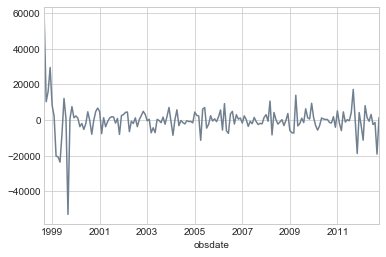

In [90]:
#VisitorsNatNZTS9: Average number of visitors in New Zealand by country of residence (Monthly)
model2 = sm.tsa.statespace.SARIMAX(df2['Total'],order=(0,1,0), seasonal_order=(1,1,0,12))
results2 = model2.fit()
print(results2.summary())
results2.resid.plot(color='slategray')

# 6. Model Fit

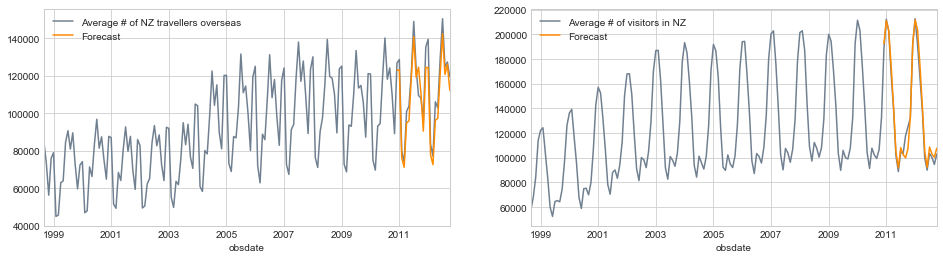

In [91]:
df1['Forecast'] = results1.predict(start = 147, end= 170, dynamic= True)  
df2['Forecast'] = results2.predict(start = 147, end= 170, dynamic= True)  

plt.subplot(1,2,1)
df1['Total'].plot(color='slategray', figsize=(16,4),label='Average # of NZ travellers overseas')
df1['Forecast'].plot(color='darkorange',label='Forecast')
plt.legend()

plt.subplot(1,2,2)
df2['Total'].plot(color='slategray', figsize=(16,4),label='Average # of visitors in NZ')
df2['Forecast'].plot(color='darkorange',label='Forecast')
plt.legend(loc='upper left')

# 7. Prediction of Future Values

In [92]:
future_dates = [df1.index[-1] + DateOffset(months=x) for x in range(1,26)]
future_dates_df1 = pd.DataFrame(index=future_dates[1:],columns=df1.columns)
df1 = pd.concat([df1,future_dates_df1])
df1.drop(['Total_trend','Total_1D','Total_SeasonalD','Forecast'],axis=1,inplace=True)

future_dates = [df2.index[-1] + DateOffset(months=x) for x in range(1,26)]
future_dates_df2 = pd.DataFrame(index=future_dates[1:],columns=df2.columns)
df2 = pd.concat([df2,future_dates_df2])
df2.drop(['Total_trend','Total_1D','Total_SeasonalD','Forecast'],axis=1,inplace=True)

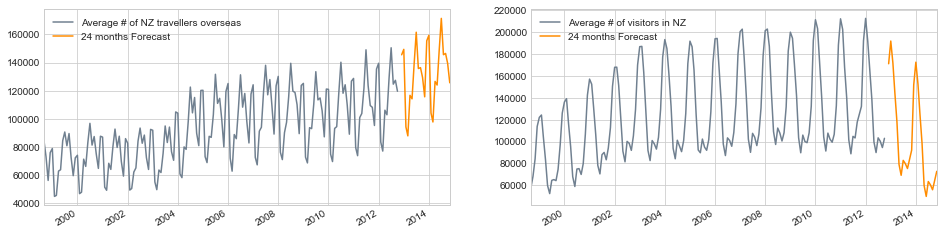

In [93]:
df1['Forecast'] = results1.predict(start = 170, end= 194, dynamic= True)  
df2['Forecast'] = results2.predict(start = 170, end= 194, dynamic= True)  

plt.subplot(1,2,1)
df1['Total'].plot(color='slategray', figsize=(16,4),label='Average # of NZ travellers overseas')
df1['Forecast'].plot(color='darkorange',label='24 months Forecast')
plt.legend()

plt.subplot(1,2,2)
df2['Total'].plot(color='slategray', figsize=(16,4),label='Average # of visitors in NZ')
df2['Forecast'].plot(color='darkorange',label='24 months Forecast')
plt.legend(loc='upper left')